# Part 0. Fundamental

## Confusion Matrix

$ TP = true\ positive $

$ FP = false\ positive\ (type\ I\ error) $

$ FN = false\ negative\ (type\ II\ error) $

$ TN = true\ negative $

**Computation Example**

In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
actual = [1,1,0,1,0,0,1,0,0,0]
predicted = [1,0,0,1,0,0,1,1,1,0]

# putting groud truth and prediction in it.
tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
print(tn, fp, fn, tp)

4 2 1 3


In [3]:
confusion_matrix(actual, predicted)

array([[4, 2],
       [1, 3]], dtype=int64)

## Accuracy, Precision, Recall, F1 Score

- Accuracy = $\frac{TP+TN}{TP+FP+FN+TN}$

- Precision = How many correct prediction are there in the positive sample. $\frac{TP}{TP+FP}$

- Recall = How many facts are predicted precisely.
$\frac{TP}{TP+FN}$

- F1 Score = average of precision rate and recall rate.
$\frac{\frac{1}{Precision}}{\frac{1}{Recall}} $

In [4]:
accuracy = (tp+tn)/(tn+tp+fn+fp)
precision = tp/(tp+fp)
recall = tp/(tp/fn)
f1 = (1/precision)/(1/recall)
print('accuracy: ', accuracy, '\nprecision: ', precision, '\nrecall: ', recall, '\nF1 Score: ', f1)

accuracy:  0.7 
precision:  0.6 
recall:  1.0 
F1 Score:  1.6666666666666667


## ROC curve and ROC area

**Roc curve** is comparing TPR and FPR under various decision threshold.
- As the curve approaching a higher value, indicating that the higher the rate of correct judgement.

- The more significant the distribution difference between the two categories, the higher the AUC score (area under ROC curve), the higher the efficiency.

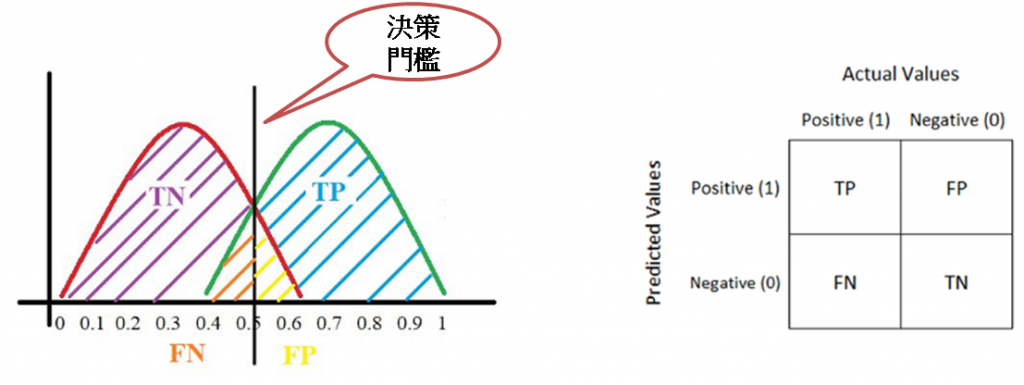

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score, auc
import pandas as pd

In [6]:
actual = [1,1,0,1,0,0,1,0,0,0]
predicted = np.around(np.random.normal(size=10).tolist(), 2)
df = pd.DataFrame({'predicted':predicted, 'actual':actual})

# calculate the number of true 1's and fasle 0's in the 'actual' column
P = df[df['actual']==1].shape[0]
N = df[df['actual']==0].shape[0]
print(P, N)
y_unit = 1/P
x_unit = 1/N

4 6


In [7]:
print(y_unit, x_unit)

0.25 0.16666666666666666


In [8]:
# Coordinates
X, y = [], []
current_X, current_y = 0, 0
for Tuple in df.itertuples():
    if Tuple[2] == 1: # actual
        current_y += y_unit
    else: current_X += x_unit
    
    X.append(current_X)
    y.append(current_y)

In [9]:
X = np.array(X); y = np.array(y)
print(X,'\n==\n', y)

[0.         0.         0.16666667 0.16666667 0.33333333 0.5
 0.5        0.66666667 0.83333333 1.        ] 
==
 [0.25 0.5  0.5  0.75 0.75 0.75 1.   1.   1.   1.  ]


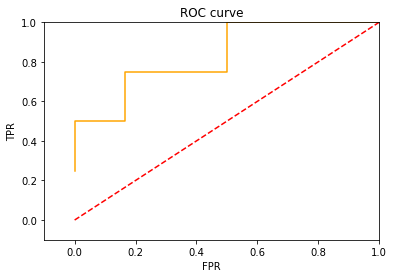

In [10]:
plt.title('ROC curve')
plt.plot(X, y, color='orange')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1,1])
plt.ylim([-0.1,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show();

In [11]:
actual, predicted

([1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
 array([ 0.23,  1.48, -1.07,  0.41,  1.35,  0.64,  1.15, -1.11, -0.14,
         0.34]))

0.75


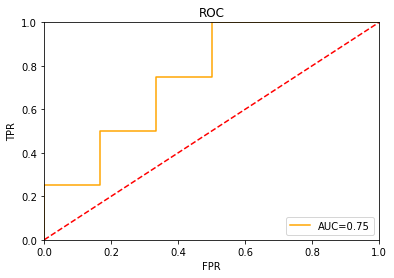

In [12]:
# from scikit learn package
fpr, tpr, threshold = roc_curve(df['actual'], df['predicted'])

df_auc = auc(fpr, tpr)
print(df_auc)

# visualize
plt.title('ROC')
plt.plot(fpr, tpr, color='orange', label='AUC=%.2f' %df_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show();

## Loss Calculation

In [13]:
import matplotlib.pyplot as plt
import numpy as np

$gini = [p*(1-p)]+[(1-p)*(1-(1-p))]$

$entropy = -p*log_2p-(1-p)*log_2(1-p)$

$classification\ error = 1-max(p, 1-p)$

In [14]:
def gini(p):
    q = 1-p
    return p*q + q*p

def entropy(p):
    q = 1-p
    return -p*np.log2(p) - q*np.log2(q)

def classification_error(p):
    q = 1-p
    return 1-max(p, q)

print(gini(0.8), entropy(0.8), classification_error(0.8))

0.31999999999999995 0.7219280948873623 0.19999999999999996


## KFold

In [15]:
import numpy as np
from sklearn.model_selection import KFold

In [16]:
X = np.array([[1, 2], [3, 4], [5,6], [7, 8]])
y = np.array([1, 2, 3, 4])

In [17]:
# number of folds, shuffle:bool, random_state
kf = KFold(n_splits=2, shuffle=True, random_state=42)
# if shuffle is True, you get different results everytime you run the code.

In [18]:
for train_index, test_index in kf.split(X):
    print("\nTRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("\nTrain X:", X_train, "\nTrain_y:", y_train)
    print("Test X:", X_test, "\ntest_y:", y_test)


TRAIN: [0 2] TEST: [1 3]

Train X: [[1 2]
 [5 6]] 
Train_y: [1 3]
Test X: [[3 4]
 [7 8]] 
test_y: [2 4]

TRAIN: [1 3] TEST: [0 2]

Train X: [[3 4]
 [7 8]] 
Train_y: [2 4]
Test X: [[1 2]
 [5 6]] 
test_y: [1 3]


# Part 1. Decision Tree

In [2]:
import pandas as pd
import gdown, os, zipfile, sys

In [9]:
retail_data = pd.read_csv('./OnlineRetail.csv', header=0)

In [10]:
retail_data.shape

(12, 3)

In [12]:
retail_data.isnull().sum()

Title      0
Content    0
Source     0
dtype: int64

In [13]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    12 non-null     object
 1   Content  12 non-null     object
 2   Source   12 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


## Data Cleaning

In [14]:
retail_data.dropna().shape

(12, 3)

In [15]:
retail_data.dropna(inplace=True)
retail_data.shape

(12, 3)

In [16]:
retail_data.dtypes

Title      object
Content    object
Source     object
dtype: object

In [27]:
# Change the value in col: 'Customer ID' from int to string
retail_data['CustomerID'] = retail_data['CustomerID'].astype(int).astype(str)

In [28]:
retail_data.dtypes
# CustomerID has become an object in the notebook

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

## Add a "Return" column

In [29]:
# TR = p * Q
retail_data['Return'] = retail_data['UnitPrice'] * retail_data['Quantity']

In [30]:
retail_data.reset_index(inplace=True)

In [31]:
retail_data.head(4)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34


## Calculate different returns by Customer ID's

In [32]:
retail_amount = retail_data.groupby('CustomerID')['Return'].sum()

In [33]:
retail_amount.head()

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
Name: Return, dtype: float64

In [34]:
retail_data.reset_index(inplace=True)

In [35]:
retail_data.head()

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30
1,1,1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34


## Number of transactions for each customer

In [36]:
retail_data.groupby('CustomerID')['InvoiceNo'].count()

CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     13
18283    756
18287     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [37]:
retail_transaction = retail_data.groupby('CustomerID')['InvoiceNo'].count()

In [38]:
retail_amount_transaction = pd.merge(retail_amount, retail_transaction, how='inner', on='CustomerID')

In [39]:
retail_amount_transaction

,Return,InvoiceNo
CustomerID,,
12346,0.00,2
12347,4310.00,182
12348,1797.24,31
12349,1757.55,73
12350,334.40,17
...,...,...
18280,180.60,10
18281,80.82,7
18282,176.60,13


In [40]:
# type(retail_data['InvoiceDate'])
pd.to_datetime(retail_data['InvoiceDate'], format='%d-%m-%Y %H:%M')
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [41]:
max_date = retail_data['InvoiceDate'].max(); max_date

Timestamp('2011-12-09 12:50:00')

In [42]:
retail_data['Date Diff'] = max_date - retail_data['InvoiceDate']

In [43]:
retail_data.head()

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Date Diff
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373 days 04:24:00
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373 days 04:24:00
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00


In [44]:
# 距離最後一次去商店時間多久?
retail_date_diff = retail_data.groupby('CustomerID')['Date Diff'].min(); retail_date_diff.head()

CustomerID
12346   325 days 02:33:00
12347     1 days 20:58:00
12348    74 days 23:37:00
12349    18 days 02:59:00
12350   309 days 20:49:00
Name: Date Diff, dtype: timedelta64[ns]

## Merging data to get the final dataset

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [46]:
retail= pd.merge(retail_amount_transaction, retail_date_diff,on='CustomerID', how='inner')

In [47]:
retail.head(); retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Return     4372 non-null   float64        
 1   InvoiceNo  4372 non-null   int64          
 2   Date Diff  4372 non-null   timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 136.6+ KB


In [48]:
retail = retail.rename({'Return':'Amount','InvoiceNo':'Frequency', 'Date Diff':'Recency'}, axis=1)

In [49]:
# Extract only days diff from the recency column
retail['Recency'] = retail['Recency'].dt.days

In [50]:
retail.head(5)

,Amount,Frequency,Recency
CustomerID,,,
12346,0.00,2,325
12347,4310.00,182,1
12348,1797.24,31,74
12349,1757.55,73,18
12350,334.40,17,309


In [51]:
attributes = ['Amount', 'Frequency', 'Recency']
retail[attributes].head()

,Amount,Frequency,Recency
CustomerID,,,
12346,0.00,2,325
12347,4310.00,182,1
12348,1797.24,31,74
12349,1757.55,73,18
12350,334.40,17,309


## Visualizing data to observe outliers

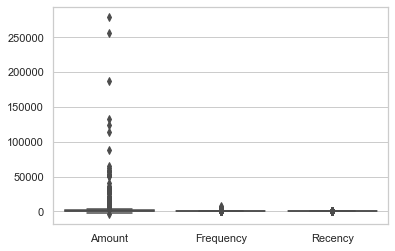

In [52]:
import seaborn as sns
sns.set_theme(style='whitegrid')
tips = sns.load_dataset('tips')
ax = sns.boxplot(data=retail[attributes])

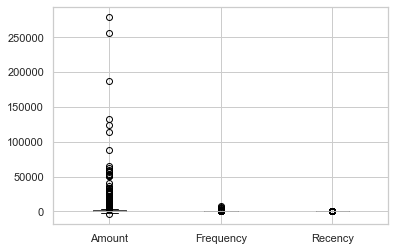

In [53]:
retail.boxplot();

**Remove the outliers**

In [54]:
Q1 = retail.Amount.quantile(0.05)
Q3 = retail.Amount.quantile(0.95)

IQR = Q3-Q1
retail = retail[(retail.Amount >= Q1 - 1.5*IQR) & (retail.Amount <= Q3 + 1.5*IQR)]

Q1 = retail.Frequency.quantile(0.05)
Q3 = retail.Frequency.quantile(0.95)

IQR = Q3-Q1
retail = retail[(retail.Frequency >= Q1 - 1.5*IQR) & (retail.Frequency <= Q3 + 1.5*IQR)]

Q1 = retail.Frequency.quantile(0.05)
Q3 = retail.Frequency.quantile(0.95)

IQR = Q3-Q1
retail = retail[(retail.Recency >= Q1 - 1.5*IQR) & (retail.Recency <= Q3 + 1.5*IQR)]

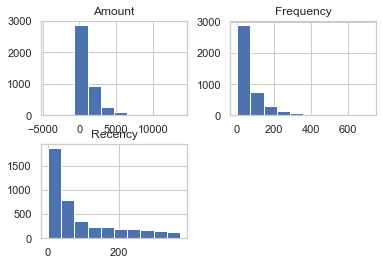

In [55]:
retail.hist();

## Data Labeling

In [56]:
retail['target'] = np.nan

for i in range(retail.shape[0]): # rows
    if retail['Amount'][i]>6000:
        retail['target'][i] = 5
    elif retail['Amount'][i] > 4500 and retail['Amount'][i] <=6000:
        retail['target'][i] = 4
    elif retail['Amount'][i] > 3000 and retail['Amount'][i] <=4500:
        retail['target'][i] = 3
    elif retail['Amount'][i] > 1500 and retail['Amount'][i] <=3000:
        retail['target'][i] = 2
    elif retail['Amount'][i] > 0 and retail['Amount'][i] <=1500:
        retail['target'][i] = 1
    else:
        retail['target'][i] = 0
    
print(retail)

<ipython-input-56-57fe23508d11>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['target'][i] = 0
<ipython-input-56-57fe23508d11>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['target'][i] = 3
<ipython-input-56-57fe23508d11>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['target'][i] = 2
<ipython-input-56-57fe23508d11>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

             Amount  Frequency  Recency  target
CustomerID                                     
12346          0.00          2      325     0.0
12347       4310.00        182        1     3.0
12348       1797.24         31       74     2.0
12349       1757.55         73       18     2.0
12350        334.40         17      309     1.0
...             ...        ...      ...     ...
18278        173.90          9       73     1.0
18280        180.60         10      277     1.0
18281         80.82          7      180     1.0
18282        176.60         13        7     1.0
18287       1837.28         70       42     2.0

[4293 rows x 4 columns]


In [57]:
retail.shape

(4293, 4)

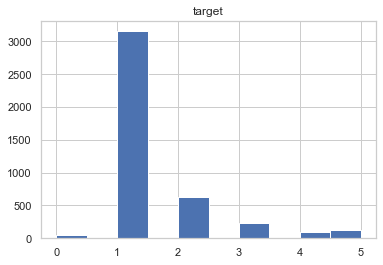

In [58]:
retail.hist(column='target');

# Classification

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Generate training data
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text

train_x, test_x, train_y, test_y = train_test_split(retail[['Frequency', 'Recency']], retail['target'], test_size=0.3, random_state=42)

In [61]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(3005, 2) (3005,) (1288, 2) (1288,)


In [62]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import plot_tree

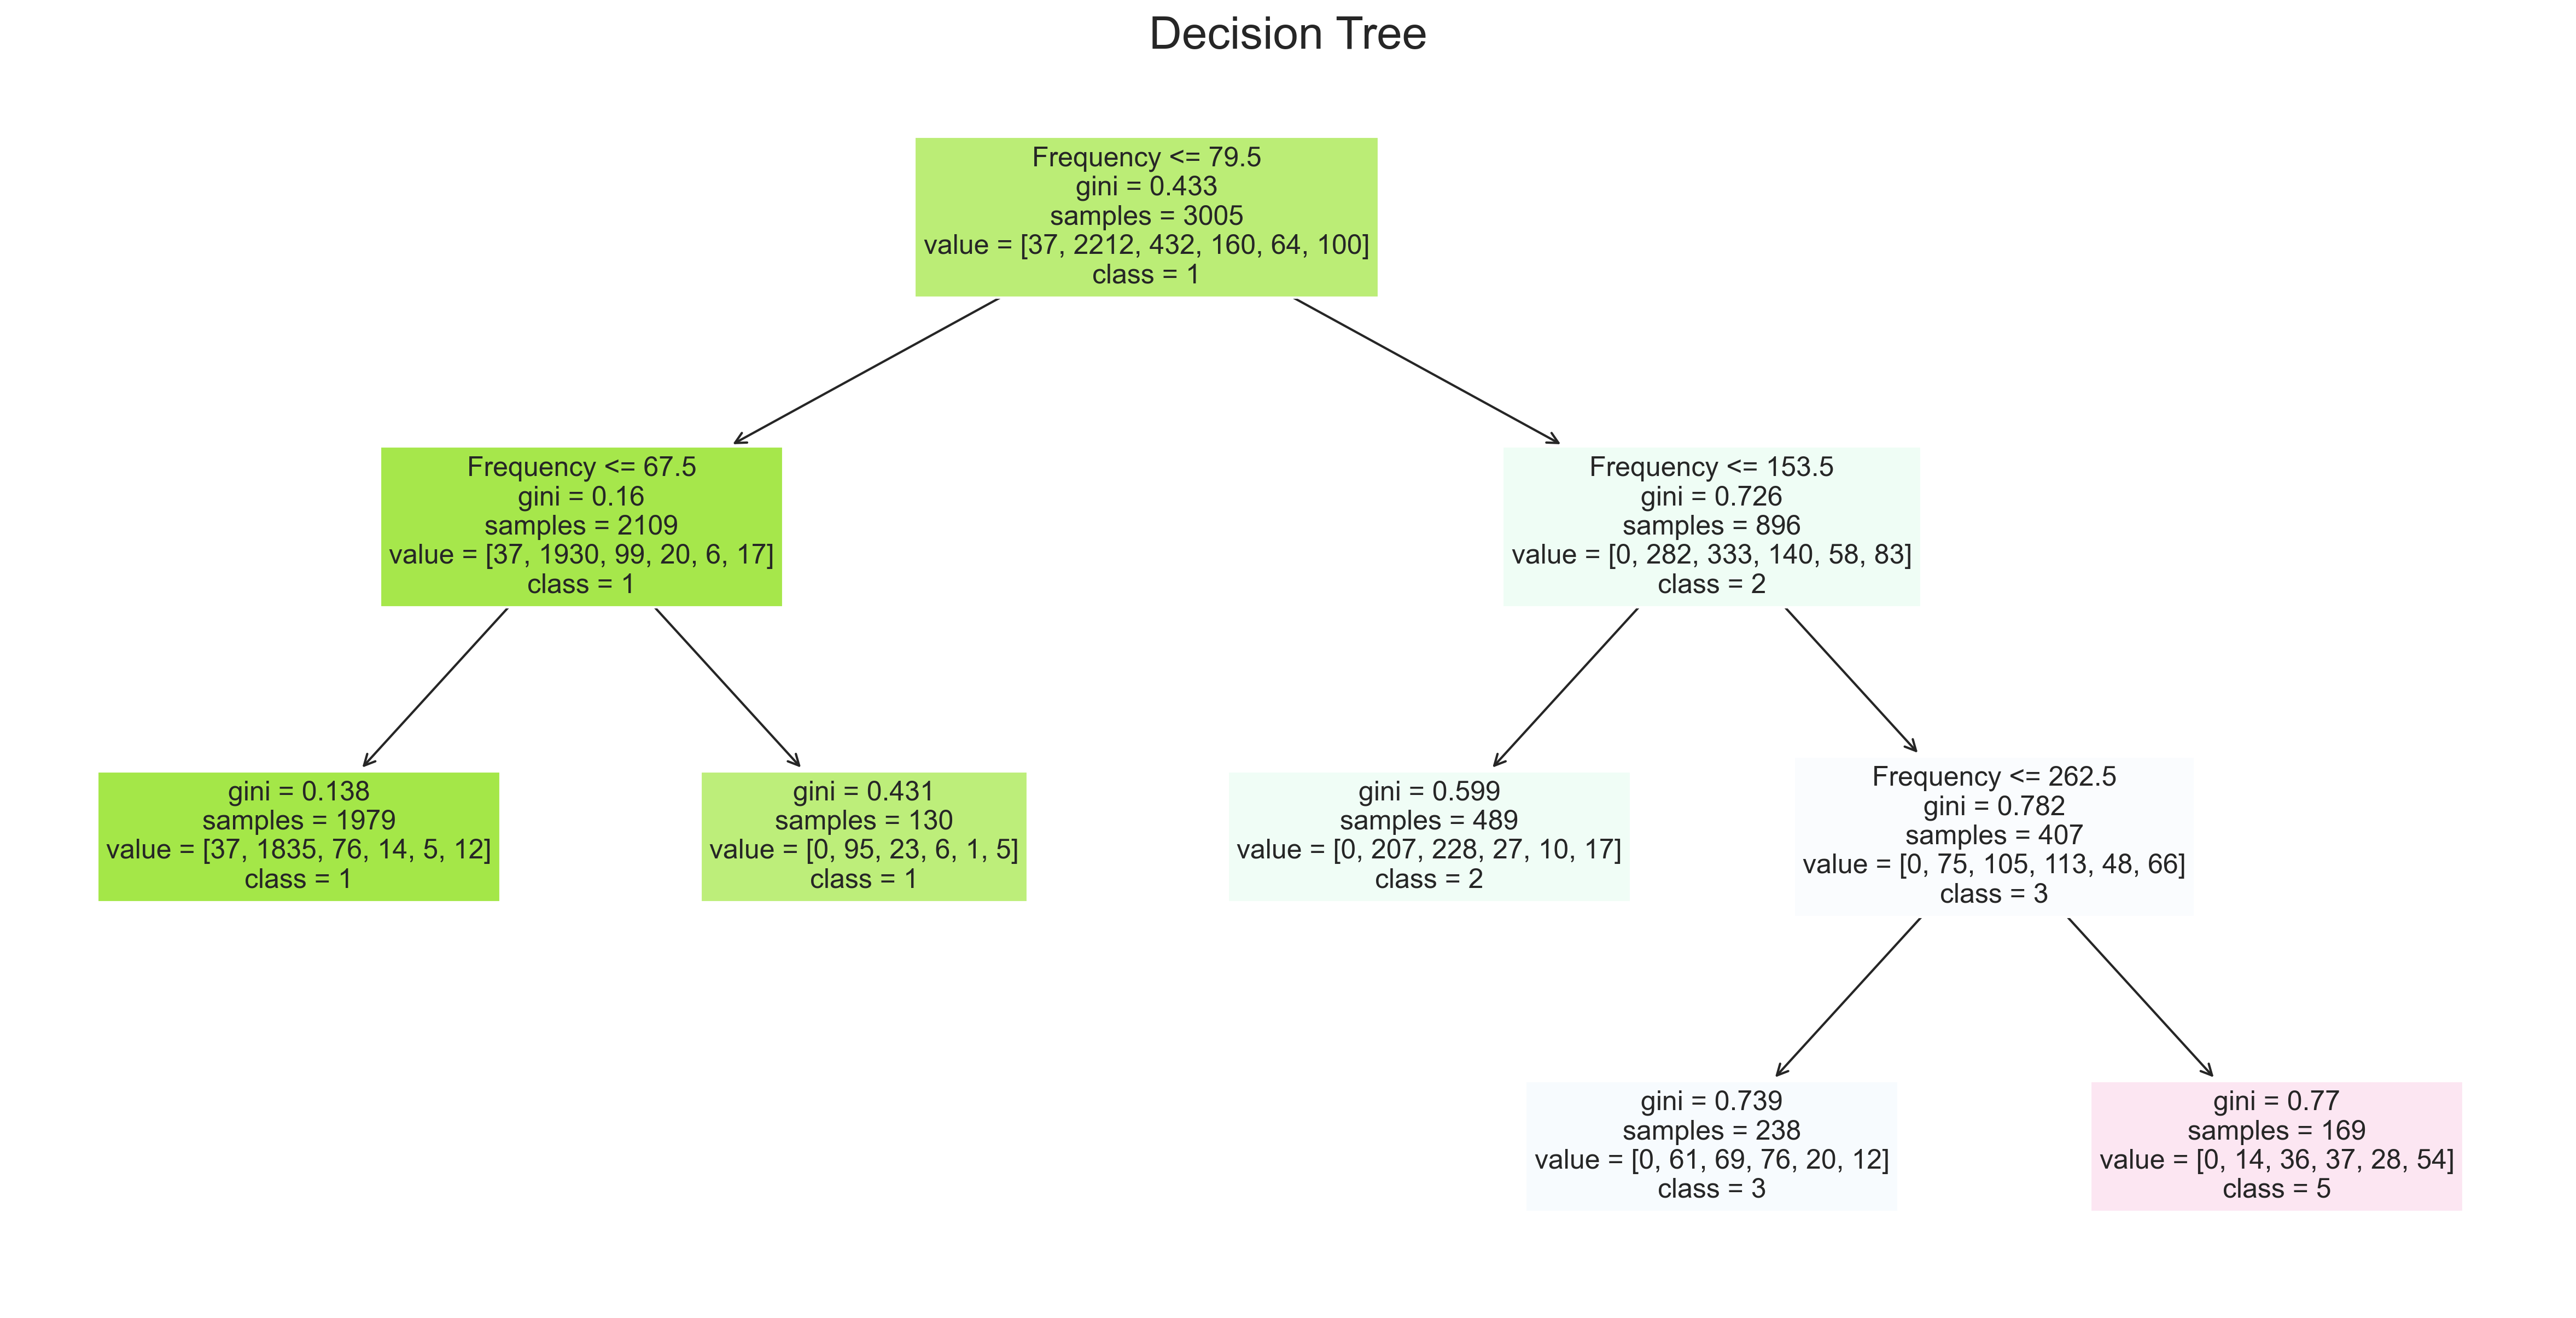

In [63]:
classifier = tree.DecisionTreeClassifier(max_leaf_nodes=5) # tree max depth=3
classifier = classifier.fit(train_x, train_y)

fig = plt.figure(num=None, figsize=(30, 12), dpi=300, facecolor='w', edgecolor='k')
fig.set_size_inches(20, 10)

tree.plot_tree(classifier, feature_names=['Frequency', 'Recency'], fontsize=12, filled=True, class_names=['0','1','2','3','4', '5'])
plt.title('Decision Tree', fontsize=20)
plt.show()

**Classify 10 customer types**

In [64]:
classifier = tree.DecisionTreeClassifier(criterion='gini', random_state=0, max_leaf_nodes=10)
classifier = classifier.fit(train_x, train_y)

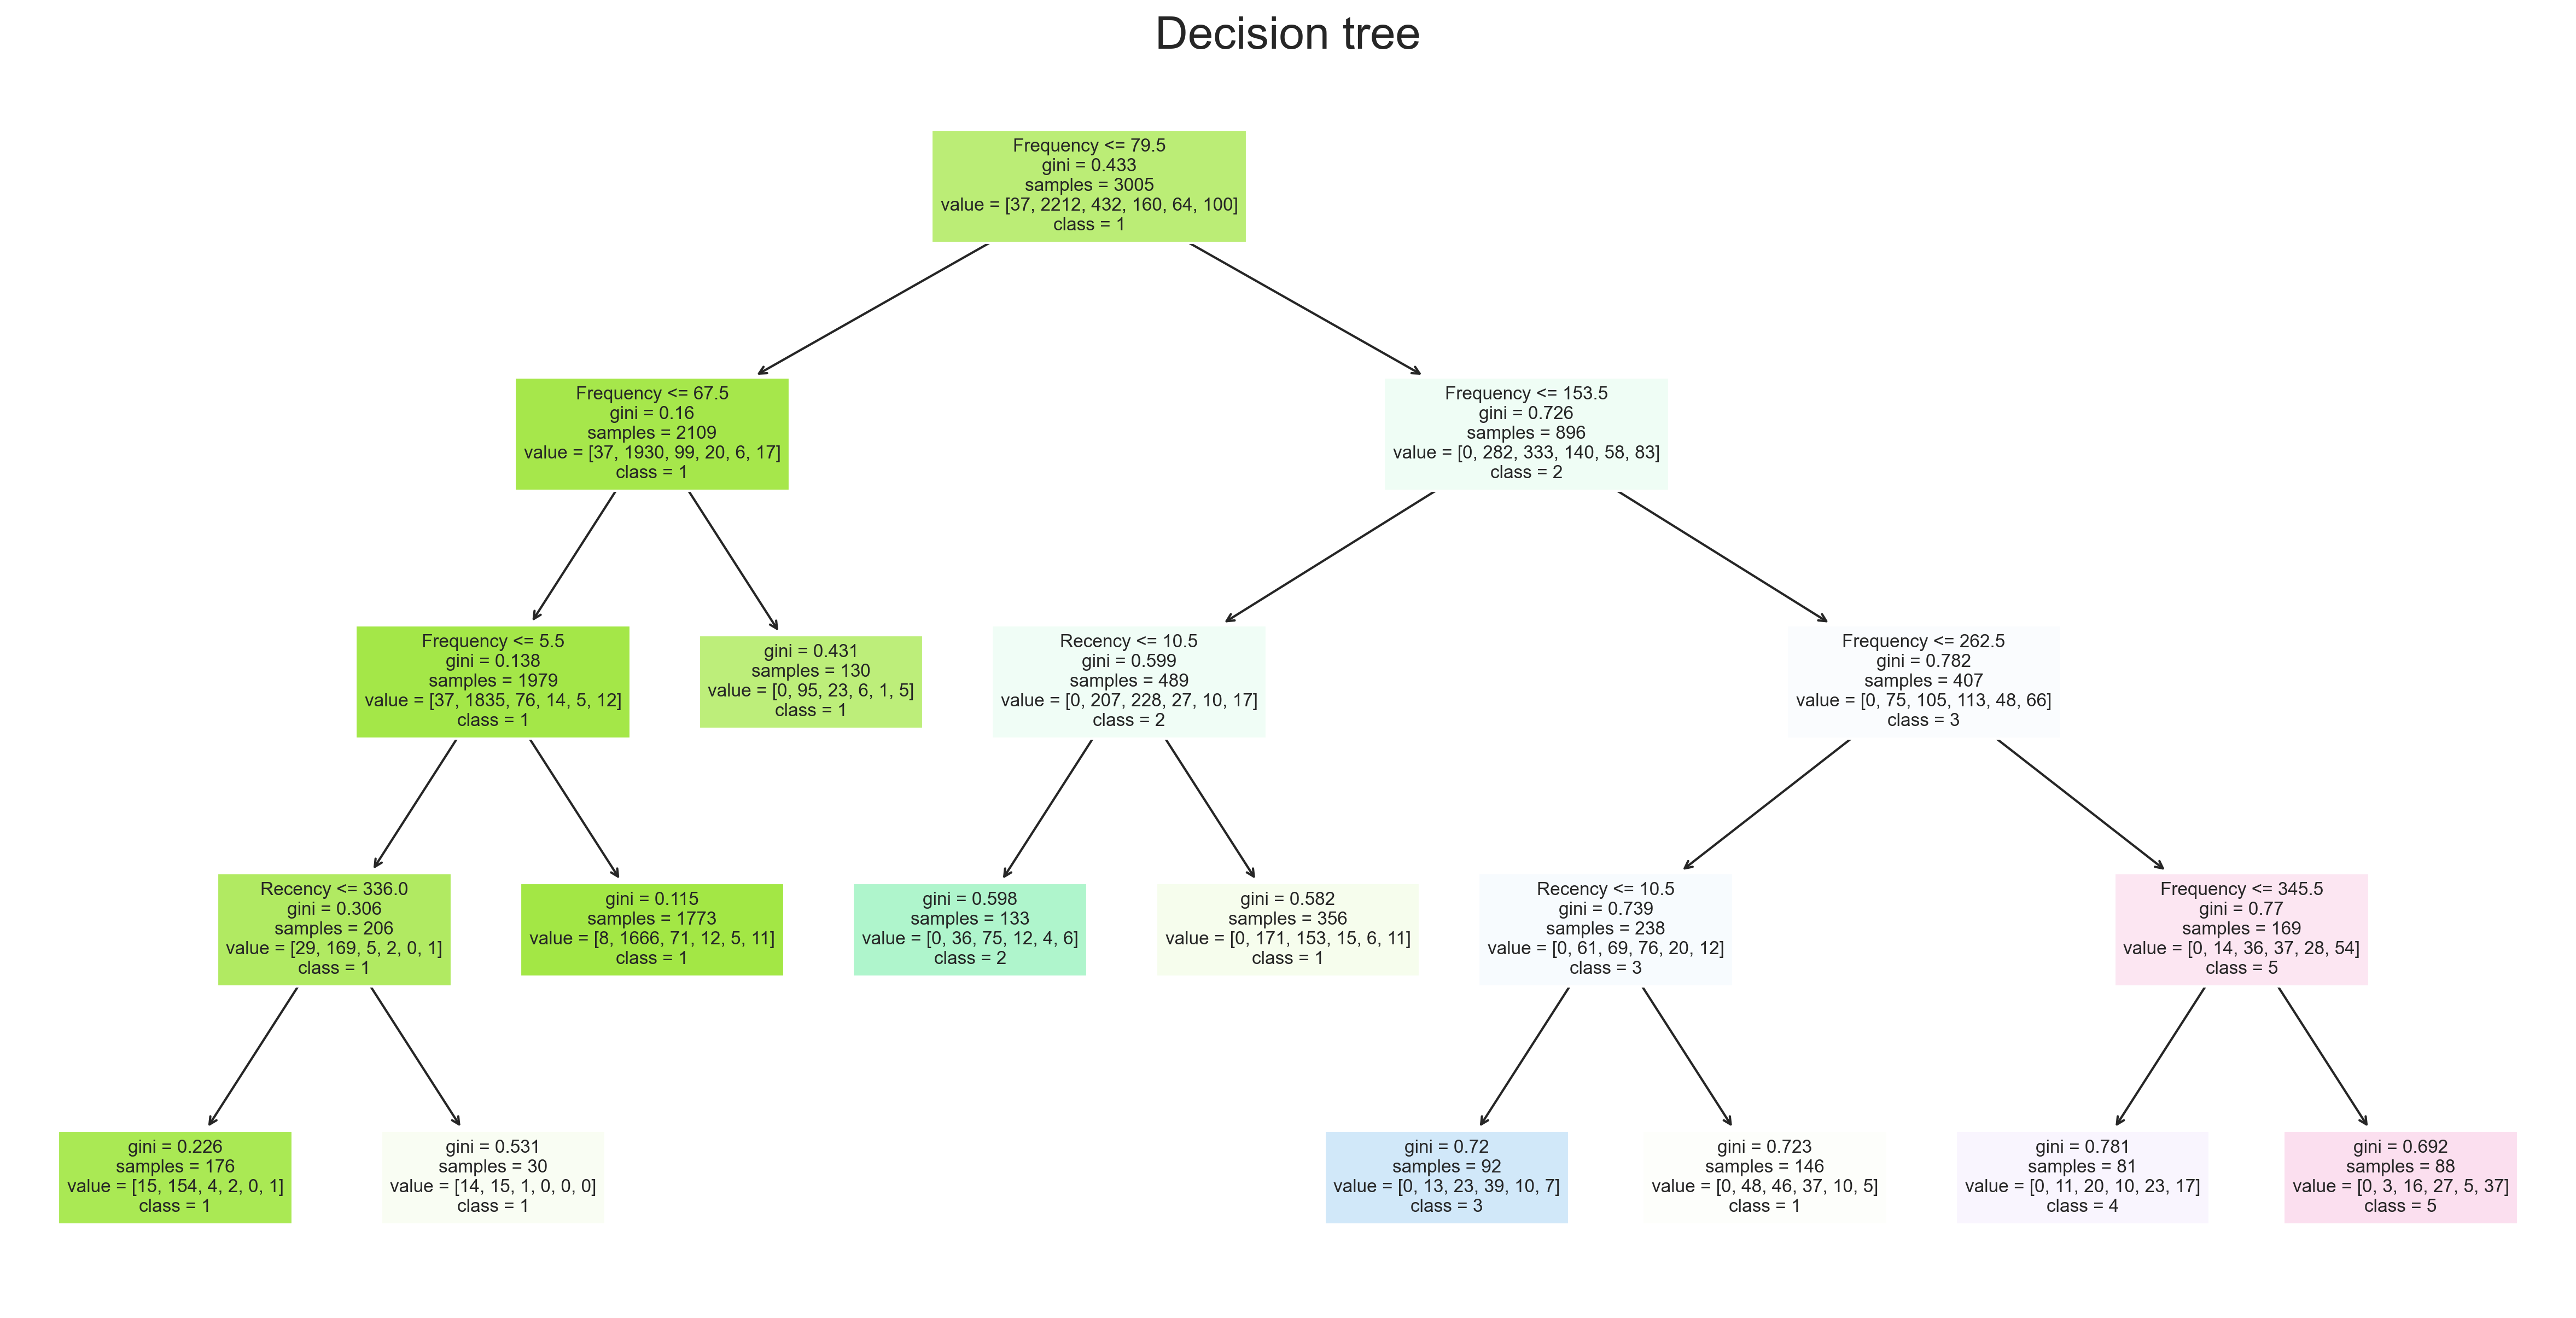

In [65]:
fig = plt.figure(num=None, figsize=(20, 6), dpi=300, facecolor='w', edgecolor='k')
fig.set_size_inches(20, 10)

tree.plot_tree(classifier, feature_names = ['Frequency', 'Recency'], fontsize=8, filled=True, class_names=['0', '1', '2', '3', '4', '5'])
plt.title('Decision tree', fontsize=20)
plt.show()

# Classification using Supervised learning

In [157]:
import gdown

In [159]:
amazon_review = pd.read_csv('Amazon_review.csv', delimiter=',', header=None)
amazon_review.columns = ['text', 'label']
amazon_review.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,Positive
1,The best soundtrack ever to anything.: I'm rea...,Positive
2,Amazing!: This soundtrack is my favorite music...,Positive
3,Excellent Soundtrack: I truly like this soundt...,Positive
4,"Remember, Pull Your Jaw Off The Floor After He...",Positive


**Using our data**

In [160]:
import numpy as np

In [161]:
pd.read_csv('Polarity and Subjectivity.csv').drop('Unnamed: 0', axis=1).head()

,Article,Source,Polarity,Subjectivity
0,US arms supplies to Ukraine do not contribute ...,TASS,0.087500,0.312500
1,Belarusian President AlexanderLukashenko says ...,TASS,0.003472,0.197917
2,The Ukrainian authorities are stepping up a ca...,TASS,-0.035816,0.328844
3,VolodymyrAbramov was trying desperately to put...,BBC,-0.014234,0.378375
4,Russia has pulled troops away from Kyiv and sh...,BBC,0.049256,0.337170


In [162]:
# We find that our source data have similar subjectivity value, so we decided to use only polarity as the source of classification.
news_article = pd.read_csv('Polarity and Subjectivity.csv')
news_article.drop(['Unnamed: 0', 'Subjectivity'], axis=1, inplace=True)

In [163]:
# Feature Engineering
# labling polarity
news_article['Label'] = np.nan

for i in range(news_article.shape[0]):
    if news_article.Polarity[i]>0:
        news_article['Label'][i] = 'Positive'
    else:
        news_article['Label'][i] = 'Negative'
        
news_article.tail()

<ipython-input-163-6a17dbd9d426>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_article['Label'][i] = 'Positive'
C:\Users\megan\python\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-163-6a17dbd9d426>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_article['Label'][i] = 'Negative'


,Article,Source,Polarity,Label
7,"After years spent translating Hollywood films,...",Moscow,0.087285,Positive
8,Western powers were readying new sanctions aga...,Moscow,-0.001139,Negative
9,Ukrainian President Volodymyr Zelensky accused...,CNN,-0.090761,Negative
10,Oksana Kostychenko walks down a narrow pathway...,CNN,-0.016737,Negative
11,The Russian column of tanks and armored person...,CNN,-0.075572,Negative


In [164]:
news_article['source']=np.nan

for i in range(news_article.shape[0]):
    if news_article['Source'][i] == 'TASS' or news_article['Source'][i] == 'Moscow':
        news_article['source'][i] = 0
    else:
        news_article['source'][i] = 1
        
news_article.tail()
news_article.drop(['Source'], axis=1, inplace=True)
news_article.head()

<ipython-input-164-bc0c3420f04c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_article['source'][i] = 0
<ipython-input-164-bc0c3420f04c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_article['source'][i] = 1


,Article,Polarity,Label,source
0,US arms supplies to Ukraine do not contribute ...,0.087500,Positive,0.0
1,Belarusian President AlexanderLukashenko says ...,0.003472,Positive,0.0
2,The Ukrainian authorities are stepping up a ca...,-0.035816,Negative,0.0
3,VolodymyrAbramov was trying desperately to put...,-0.014234,Negative,1.0
4,Russia has pulled troops away from Kyiv and sh...,0.049256,Positive,1.0


# Spliting Data

In [286]:
from sklearn import model_selection
# 90% of data is used for training data, 10% for testing data
train_x, test_x, train_y, test_y = model_selection.train_test_split(news_article[['Article', 'source']], news_article.Label, test_size=0.2, random_state=1)

In [287]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9, 2) (3, 2) (9,) (3,)


In [288]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [289]:
# fit label encoder and retrun encoded label
train_y_en = encoder.fit_transform(train_y) # turn negative, positive into 0 and 1 value
test_y_en = encoder.fit_transform(test_y)

In [290]:
test_y_en

array([0, 0, 1])

In [291]:
pd.DataFrame(test_y_en, test_y)

,0
Label,
Negative,0
Negative,0
Positive,1


In [292]:
print(encoder.inverse_transform([1]))

['Positive']


In [293]:
from sklearn.feature_extraction.text import TfidfVectorizer
# This is a word level tf-idf

In [294]:
# Convert a collection of raw documents into a matrix of tf-idf features

# Max Features: build a vocab that only consider the to max_features ordered by term frequency across the corpus.
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=5000)

In [295]:
train_x.shape

(9, 2)

In [296]:
tfidf_vect = tfidf_vect.fit(train_x.Article) # learn vocabulary and compute idf from training data set.

In [297]:
xtrain_tfidf = tfidf_vect.transform(train_x.Article) # compute tfidf for training data set
xtest_tfidf = tfidf_vect.transform(test_x.Article) # compute tfidf for testing data set

In [298]:
# print(xtest_tfidf)

In [299]:
len(tfidf_vect.get_feature_names())

1655

In [300]:
print(xtrain_tfidf)

  (0, 1650)	0.04480097736649749
  (0, 1647)	0.03290045618530924
  (0, 1646)	0.08720803221984781
  (0, 1639)	0.04480097736649749
  (0, 1638)	0.04480097736649749
  (0, 1634)	0.08960195473299498
  (0, 1625)	0.025939097555276274
  (0, 1621)	0.04480097736649749
  (0, 1604)	0.04480097736649749
  (0, 1600)	0.04658502366925227
  (0, 1599)	0.04480097736649749
  (0, 1598)	0.03783961873646452
  (0, 1596)	0.04480097736649749
  (0, 1593)	0.04480097736649749
  (0, 1591)	0.04480097736649749
  (0, 1588)	0.08960195473299498
  (0, 1582)	0.029069344073282606
  (0, 1563)	0.03783961873646452
  (0, 1553)	0.11351885620939356
  (0, 1548)	0.08960195473299498
  (0, 1543)	0.03783961873646452
  (0, 1536)	0.04480097736649749
  (0, 1531)	0.08399974001648396
  (0, 1528)	0.04480097736649749
  (0, 1526)	0.03783961873646452
  :	:
  (8, 137)	0.09056993735330544
  (8, 135)	0.033255884477946
  (8, 130)	0.02938338431861668
  (8, 118)	0.07865796391105555
  (8, 117)	0.03824840550239189
  (8, 105)	0.04528496867665272
  (8, 10

In [301]:
from sklearn import tree, metrics

In [302]:
classifier_tree = tree.DecisionTreeClassifier(random_state=1, max_depth=4)

# fit the training dataset on the classifier
classifier_tree = classifier_tree.fit(xtrain_tfidf, train_y_en)

# predict the labels on the testing dataset
y_prediction_tree = classifier_tree.predict(xtest_tfidf)
accuracy_tree = metrics.accuracy_score(test_y_en, y_prediction_tree)
confusion_matrix_tree = metrics.confusion_matrix(test_y_en, y_prediction_tree, labels=[0,1])

# labels=[0,1]
print('Accuracy', accuracy_tree)
print('Confusion Matrix\n', confusion_matrix_tree)

Accuracy 0.6666666666666666
Confusion Matrix
 [[1 1]
 [0 1]]


In [303]:
# labels=[1,0]
# what are labels?

confusion_matrix_tree = metrics.confusion_matrix(test_y_en, y_prediction_tree, labels=[1,0])
print('Accuracy', accuracy_tree)
print('Confusion Matrix\n', confusion_matrix_tree)

Accuracy 0.6666666666666666
Confusion Matrix
 [[1 0]
 [1 1]]


## Precision

In [304]:
print('precision for class Negative', metrics.precision_score(test_y_en, y_prediction_tree, pos_label=0))
print('precision for class Positive', metrics.precision_score(test_y_en, y_prediction_tree, pos_label=1))

precision for class Negative 1.0
precision for class Positive 0.5


## Recall

In [305]:
print('Recall for class Neg', metrics.recall_score(test_y_en, y_prediction_tree, pos_label=0))
print('Recall for class Pos', metrics.recall_score(test_y_en, y_prediction_tree, pos_label=1))

Recall for class Neg 0.5
Recall for class Pos 1.0


## Simple example

In [306]:
comment='Oh this is great, I\'m lovin it~'
comment_tfidf = tfidf_vect.transform([comment])
comment_predictions = classifier_tree.predict(comment_tfidf)

print(comment_predictions)
print(encoder.inverse_transform(comment_predictions))

[1]
['Positive']


In [307]:
comment='This is not tasty at all!'
comment_tfidf = tfidf_vect.transform([comment])
comment_predictions = classifier_tree.predict(comment_tfidf)

print(comment_predictions)
print(encoder.inverse_transform(comment_predictions))

[1]
['Positive']


**So, as we can see from the tested-predicted result, due to the fact that we only provide a very small dataset, the maching is unable to come up with a model that truely identify the polarity of a sentence. Hence, we can conclude that we might need more articles to conduct a more valid experiment.**

## Roc Curve and Roc Area

An **ROC curve** is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- Ture Positive Rate
- False Positive Rate

$ TPR = \frac{TP}{TP+FN} $

$ FPR = \frac{FP}{FP+TN} $

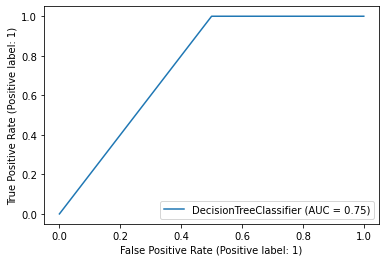

In [308]:
# estimator, input value, target
metrics.plot_roc_curve(classifier_tree, xtest_tfidf, test_y_en);

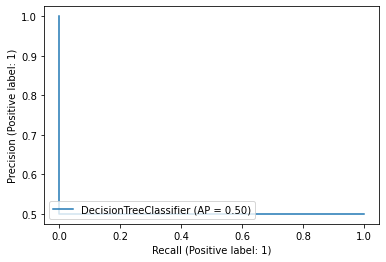

In [309]:
metrics.plot_precision_recall_curve(classifier_tree, xtest_tfidf, test_y_en);

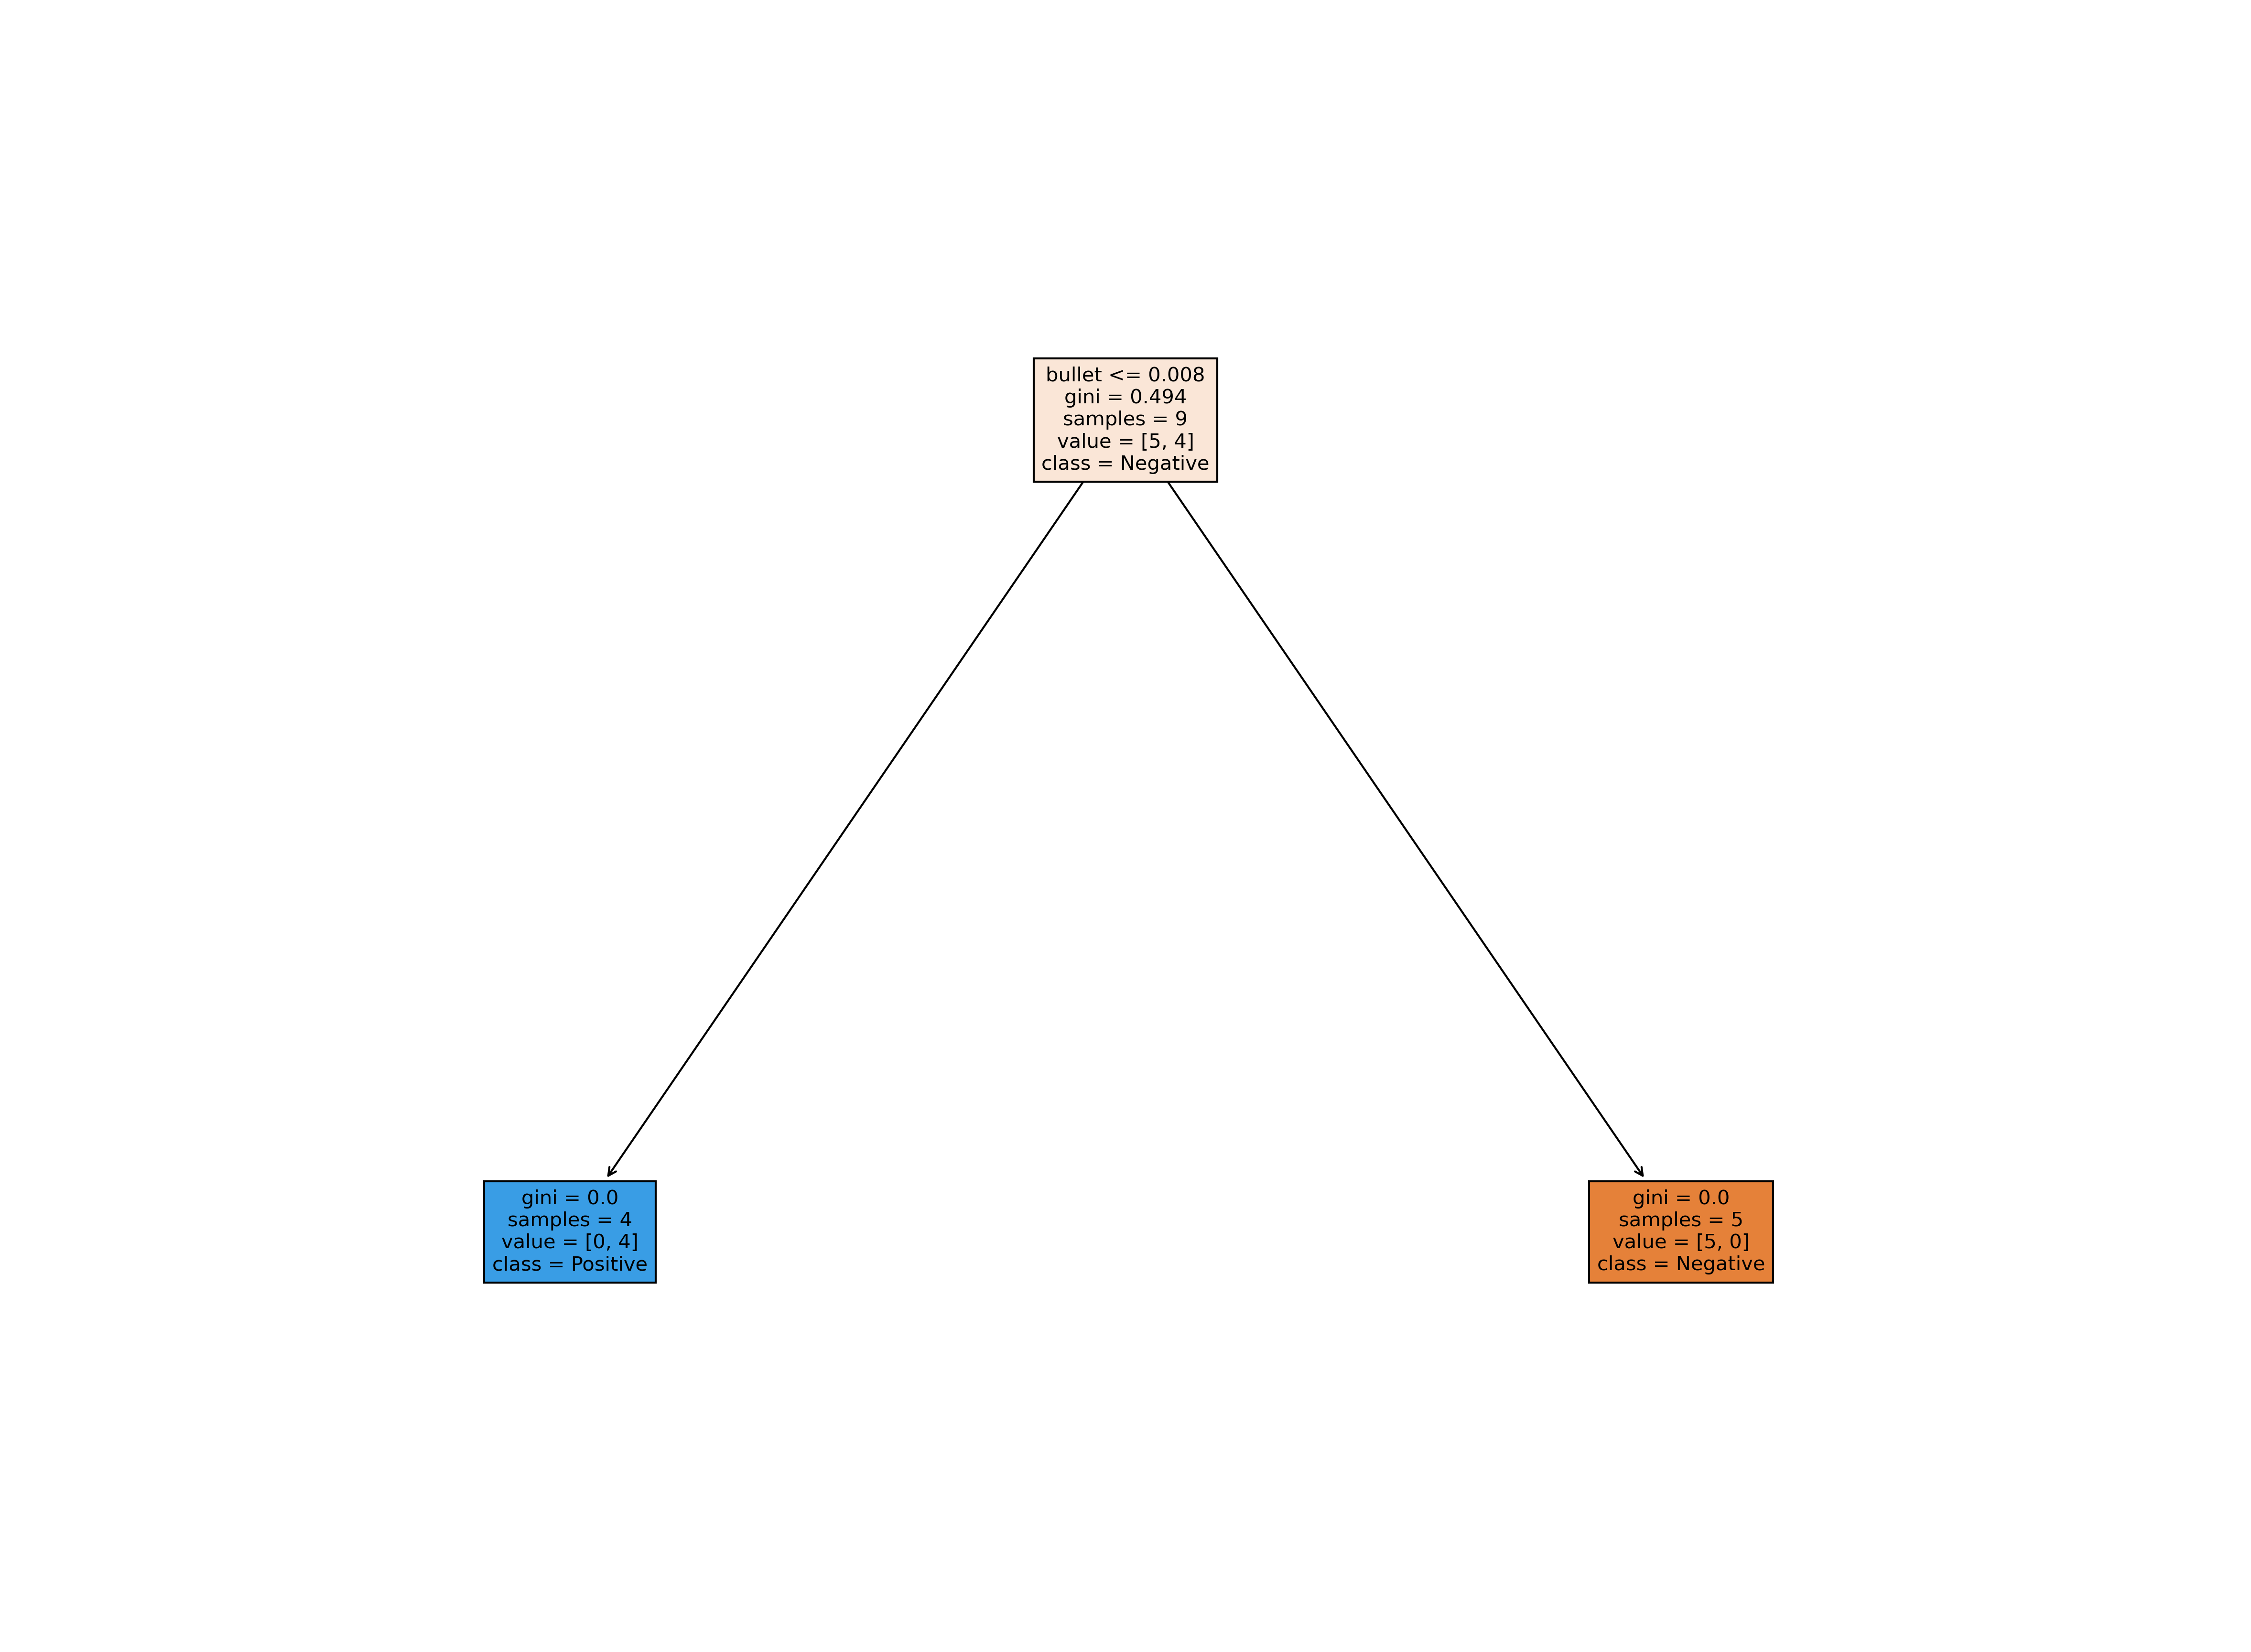

In [310]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(num=None, figsize=(20, 15), dpi=300, facecolor='w', edgecolor='k')
fig.set_size_inches(20, 15)

tree.plot_tree(classifier_tree, fontsize=10, filled = True, feature_names=tfidf_vect.get_feature_names(),class_names=['Negative','Positive']);

## Cross Validation with KFold

In [311]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree, metrics
from sklearn.model_selection import KFold

In [312]:
def classifier_tree(train_x, test_x, train_y, test_y):
    
    # Encode the target variable, label Negative-Positive: 0-1
    encoder = preprocessing.LabelEncoder()
    train_y_en = encoder.fit_transform(train_y)
    test_y_en = encoder.fit_transform(test_y)
    
    # word embedding
    tfidf_vect = TfidfVectorizer(stop_words='english', max_features=5000)
    # learn vocabulary and idf, return document-term matrix
    tfidf_vect = tfidf_vect.fit(train_x)
    xtrain_vect = tfidf_vect.transform(train_x)
    xtest_vect = tfidf_vect.transform(test_x)
    
    # dicision tree classifier
    dicision_tree = tree.DecisionTreeClassifier(random_state=1)
    # fitting training dataset on the classifier
    dicision_tree = dicision_tree.fit(xtrain_vect, train_y_en)
    
    # prediction
    test_y_pred = dicision_tree.predict(xtest_vect)
    accuracy = metrics.accuracy_score(test_y_en, test_y_pred) # ground truth, prediction
    return accuracy

In [313]:
X = amazon_review['text']; y = amazon_review['label']

## KFold

In [314]:
# adding accuracy of l consecutive folds (models) into a list
accuracy_list=[]
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Split!!
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    accuracy = classifier_tree(X_train, X_test, y_train, y_test)
    accuracy_list += [accuracy]
    
print(accuracy_list)
print('Accuracy Kfold=10: ', sum(accuracy_list)/len(accuracy_list))

[0.716, 0.719, 0.707, 0.715, 0.72, 0.702, 0.728, 0.696, 0.714, 0.725]
Accuracy Kfold=10:  0.7142


# Multilayer Perceotron classifier

In [317]:
from sklearn.neural_network import MLPClassifier

C:\Users\megan\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


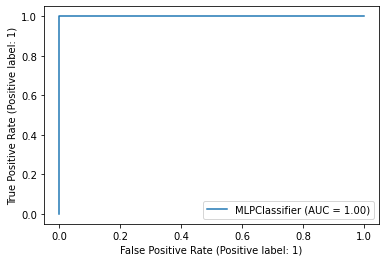

In [318]:
# ROC curve and ROC area
clf = MLPClassifier(random_state=1, max_iter=50)
clf = clf.fit(xtrain_tfidf, train_y_en)
metrics.plot_roc_curve(clf, xtest_tfidf, test_y_en)

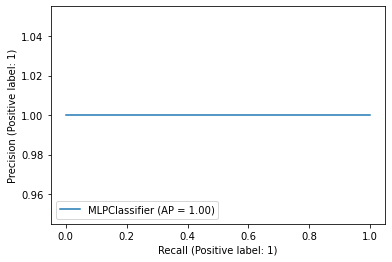

In [319]:
# Precision-Recall curve
metrics.plot_precision_recall_curve(clf, xtest_tfidf, test_y_en)